In [3]:
from datetime import datetime, timedelta
from herbie import Herbie
from paint.standard2 import cm_tmp
from toolbox import EasyMap, pc

import matplotlib.pyplot as plt
import xarray as xr
import imageio
import os
import warnings

# Suppress the specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="herbie.accessors", message="More than one time coordinate present for variable")
warnings.filterwarnings("ignore", category=UserWarning, module="herbie.core", message="Will not remove GRIB file because it previously existed.")

In [4]:
#Set date and hourly run for entire script
init_date = datetime.strptime("2023-10-12 18", "%Y-%m-%d %H") #0Z, 12Z, 18Z allows up to 41 in range via HRRR

# Data Checker - Lists available data for the current date and hourly run you choose

available_fxx = []

for fxx in range(0, 41):  # Checking for F00 to F41
    H_temp = Herbie(
        init_date.strftime("%Y-%m-%d %H"),
        model="hrrr",
        product="sfc",
        fxx=fxx
    )

    try:
        # Attempt to retrieve the data
        ds = H_temp.xarray("TMP:2 m above")
        
        # Check if valid_time has duplicates and deduplicate if necessary
        if 'valid_time' in ds.coords and ds['valid_time'].size > 1:
            _, index = np.unique(ds['valid_time'], return_index=True)
            ds = ds.isel(valid_time=index)
        
        # If successful, add the current fxx to the list
        available_fxx.append(fxx)
    except:
        # If there's an error (likely data not found), break out of the loop
        break

fxx_range = available_fxx
print(ds)

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F02 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F04 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F05 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F07 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F08 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F09 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F10 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr 

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F02 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F04 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F05 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F07 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F08 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F09 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Oct-12 18:00 UTC F10 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr 

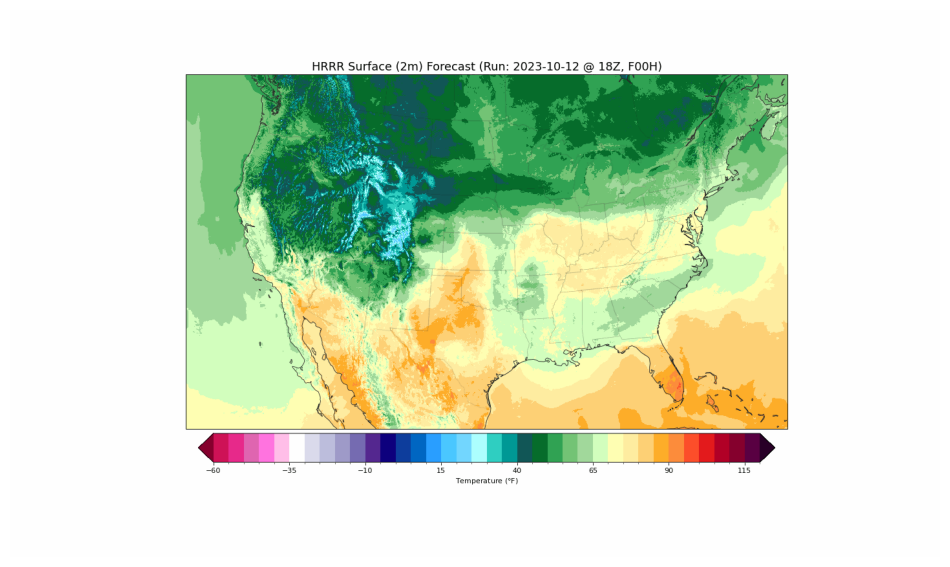

In [5]:
# Choose the correct amount of runs - ex: F0-F41
fxx_range = range(0, 41)
frames = []

for fxx in fxx_range:
    H = Herbie(
        init_date.strftime("%Y-%m-%d %H"),
        model="hrrr",
        product="sfc",
        fxx=fxx
    )

    ds = H.xarray("TMP:2 m above")

     # Check if valid_time has duplicates and deduplicate if necessary
    if 'valid_time' in ds.coords and ds['valid_time'].size > 1:
        _, index = np.unique(ds['valid_time'], return_index=True)
        ds = ds.isel(valid_time=index)

    # Convert temperature from Kelvin to Fahrenheit
    t2m_fahrenheit = (ds.t2m - 273.15) * 9/5 + 32
    t2m_fahrenheit_da = xr.DataArray(t2m_fahrenheit, coords=ds.coords, dims=ds.dims, name="t2m_fahrenheit")
    ds = ds.assign(t2m_fahrenheit=t2m_fahrenheit_da)
    
    # Create a map
    ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[17.99, 10.59]).STATES().ax

    # Plot the temperature in Fahrenheit
    p = ax.pcolormesh(ds.longitude, ds.latitude, ds.t2m_fahrenheit, transform=pc, **cm_tmp(units="F").cmap_kwargs)

    # Create a color bar
    plt.colorbar(p, ax=ax, orientation="horizontal", pad=0.01, shrink=0.8, **cm_tmp(units="F").cbar_kwargs)

    # Set a custom title with the proper date, run, and fxx
    ax.set_title(f"HRRR Surface (2m) Forecast (Run: {init_date.strftime('%Y-%m-%d @ %H')}Z, F{fxx:02}H)", fontsize=16)

    # Save the current frame as an image BEFORE showing it
    frame_filename = f"herbietemphrrr_frame_{fxx}.png"
    plt.savefig(frame_filename, dpi=80)
    frames.append(frame_filename)
    
    # Close the current plot
    plt.close()

# Combine individual frames into a GIF
import imageio.v2 as imageio_v2

with imageio_v2.get_writer('hrrr_temp.gif', mode='I', duration=500, loop=0) as writer:
    for frame_filename in frames:
        image = imageio_v2.imread(frame_filename)
        writer.append_data(image)

# Clean up individual frame files
for frame_filename in frames:
    os.remove(frame_filename)

# Display the generated GIF
plt.figure(figsize=(12, 12))
plt.imshow(imageio_v2.imread('hrrr_temp.gif'))
plt.axis('off')
plt.show()
